# CONTENTS

### 01) Import Libraries and Dataframe
### 02) Wrangle and Clean Data
### 03) Data Prep for Regression Analysis
### 04) Regression Analysis
### 05) Export Data Subset

# 01 Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Graphs are displayed within the notebook

%matplotlib inline

In [3]:
#Import and preview data
path = r'/Users/Nick/Documents/CareerFoundry/Immersion-6/College-Equity'
df = pd.read_csv(os.path.join(path, '02-Data', 'college-equity-clean.csv'))
df.head()

,Unnamed: 0,name,tier,ownership_type,state,city,zip,unitid,student_body,fraction_students_men,...,student_income_6_years_mean,student_income_6_years_median,student_income_6_years_25_percentile,student_income_6_years_75_percentile,student_income_6_years_stdev,student_income_10_years_mean,student_income_10_years_median,student_income_10_years_25_percentile,student_income_10_years_75_percentile,student_income_10_years_stdev
0,0,ASA College,Two-year for-profit,Private for-profit,NY,Brooklyn,11201-9805,404994,4437.0,0.3678,...,22300.0,18100.0,10300.0,31000.0,16800.0,29300.0,26100.0,13800.0,40400.0,21000.0
1,1,Abilene Christian University,Selective private,Private nonprofit,TX,Abilene,79699,222178,3572.0,0.4236,...,38900.0,35600.0,22500.0,50000.0,31300.0,48900.0,43000.0,26700.0,62700.0,38700.0
2,2,Abraham Baldwin Agricultural College,Nonselective four-year public,Public,GA,Tifton,31793-2601,138558,3244.0,0.4750,...,29100.0,26300.0,15800.0,37900.0,19800.0,36300.0,32900.0,19300.0,47500.0,25000.0
3,3,Academy of Art University,Four-year for-profit,Private for-profit,CA,San Francisco,94105,108232,9885.0,0.4342,...,32800.0,26900.0,13700.0,44200.0,29600.0,47300.0,38600.0,19100.0,64000.0,43500.0
4,4,Adams State University,Selective public,Public,CO,Alamosa,81101,126182,2110.0,0.5156,...,28800.0,26700.0,15600.0,37300.0,19600.0,38100.0,35200.0,21200.0,50800.0,25900.0


In [4]:
#Remove Unnamed column
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,name,tier,ownership_type,state,city,zip,unitid,student_body,fraction_students_men,fraction_students_women,...,student_income_6_years_mean,student_income_6_years_median,student_income_6_years_25_percentile,student_income_6_years_75_percentile,student_income_6_years_stdev,student_income_10_years_mean,student_income_10_years_median,student_income_10_years_25_percentile,student_income_10_years_75_percentile,student_income_10_years_stdev
0,ASA College,Two-year for-profit,Private for-profit,NY,Brooklyn,11201-9805,404994,4437.0,0.3678,0.6322,...,22300.0,18100.0,10300.0,31000.0,16800.0,29300.0,26100.0,13800.0,40400.0,21000.0
1,Abilene Christian University,Selective private,Private nonprofit,TX,Abilene,79699,222178,3572.0,0.4236,0.5764,...,38900.0,35600.0,22500.0,50000.0,31300.0,48900.0,43000.0,26700.0,62700.0,38700.0
2,Abraham Baldwin Agricultural College,Nonselective four-year public,Public,GA,Tifton,31793-2601,138558,3244.0,0.4750,0.5250,...,29100.0,26300.0,15800.0,37900.0,19800.0,36300.0,32900.0,19300.0,47500.0,25000.0
3,Academy of Art University,Four-year for-profit,Private for-profit,CA,San Francisco,94105,108232,9885.0,0.4342,0.5658,...,32800.0,26900.0,13700.0,44200.0,29600.0,47300.0,38600.0,19100.0,64000.0,43500.0
4,Adams State University,Selective public,Public,CO,Alamosa,81101,126182,2110.0,0.5156,0.4844,...,28800.0,26700.0,15600.0,37300.0,19600.0,38100.0,35200.0,21200.0,50800.0,25900.0


# 02 Wrangle and Clean Data

In [5]:
#Create subset for linear regression (LR)
LR_df = df[['student_income_10_years_median', 'median_parent_income']]
LR_df.head()

,student_income_10_years_median,median_parent_income
0,26100.0,29000
1,43000.0,101000
2,32900.0,66000
3,38600.0,92300
4,35200.0,67200


In [6]:
#Check for null values in student_income_10_years_median
LR_df['student_income_10_years_median'].isnull().sum()

29

In [7]:
#Check size before
LR_df.shape

(3645, 2)

In [8]:
#Remove observations with null student_income
LR_df = LR_df[LR_df['student_income_10_years_median'].notnull()]
LR_df.head()

,student_income_10_years_median,median_parent_income
0,26100.0,29000
1,43000.0,101000
2,32900.0,66000
3,38600.0,92300
4,35200.0,67200


In [9]:
#Check size after
LR_df.shape

(3616, 2)

#### Student income nulls removed

In [10]:
#Check for null values in median_parent_income
LR_df['median_parent_income'].isnull().sum()

0

#### No nulls in median parent income.

In [11]:
#Check summary statistics
LR_df.describe()

,student_income_10_years_median,median_parent_income
count,3616.000000,3616.000000
mean,37163.053097,71341.316372
std,11515.068772,26726.372134
min,12700.000000,21200.000000
25%,29300.000000,52600.000000
50%,35900.000000,68500.000000
75%,43500.000000,85200.000000
max,124700.000000,226700.000000


#### No wild abnormalities. Both data sets are right skewed.

In [12]:
#Rename column
LR_df.rename(columns = {'student_income_10_years_median':'median_graduate_income'}, inplace = True)
LR_df.head()

,median_graduate_income,median_parent_income
0,26100.0,29000
1,43000.0,101000
2,32900.0,66000
3,38600.0,92300
4,35200.0,67200


# 03 Data Prep for Regression Analysis

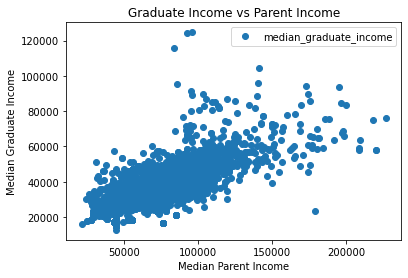

In [13]:
#Create a scatterplot

LR_df.plot(x = 'median_parent_income', y= 'median_graduate_income',style='o')
plt.title('Graduate Income vs Parent Income')  
plt.xlabel('Median Parent Income')  
plt.ylabel('Median Graduate Income')  
plt.show()

### Hypothesis: Colleges with higher median parent income will have higher median (10-year) graduate income.

In [14]:
#Reshape the variables into NumPy arrays and put them into separate objects.

X = LR_df['median_parent_income'].values.reshape(-1,1)
y = LR_df['median_graduate_income'].values.reshape(-1,1)

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04 Regression Analysis

In [16]:
# Create a regression object.

regression = LinearRegression()

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

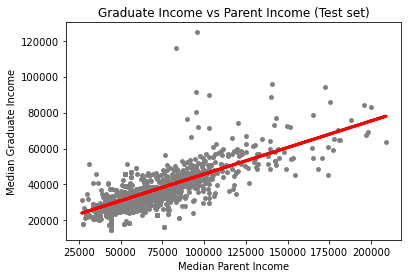

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Graduate Income vs Parent Income (Test set)')
plot_test.xlabel('Median Parent Income')
plot_test.ylabel('Median Graduate Income')
plot_test.show()

#### The line fits the data pretty well, but there are several points that are far from the line. Much of the data 25,000 < x < 100,000 is near the line, with large clusters just above and below it. However, there is more spread x > 87,500.

In [20]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) #mean squared error
r2 = r2_score(y_test, y_predicted) #R2 score. 

In [21]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29625104]]
Mean squared error:  71933753.28541605
R2 score:  0.5064154957901361


#### MSE is very large, indicating poor accuracy.
#### R2 score is about 50/100, which is not great.

In [22]:
# Create a dataframe comparing the actual and predicted values of y.

compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare.head(30)

,Actual,Predicted
0,28500.0,27512.495316
1,26700.0,30030.629142
2,32200.0,37585.030619
3,37200.0,35333.522728
4,57700.0,48161.192687
5,40800.0,28727.124573
6,24600.0,26949.618343
7,30900.0,33644.891809
8,46400.0,42621.298271
9,42800.0,44695.055539


#### Most predictions are off by a few thousand, but some are off by low tens of thousands.

#### This linear regression model is not the best model to make predictions for this data set according to the test. The MSE indicated poor accuracy, and the R2 value indicated high variance.
#### There is potential for data bias here. A third-party individual created this data set through integration of trustworthy--mostly government--sources, but the individual is not as trustworthy. For instance, the individual did not have a team to help double-check his work.

# 05 Export Data Subset

In [24]:
LR_df.to_csv(os.path.join(path, '02-Data', 'income-grad-v-parent.csv'))